In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
train_dir = "/content/drive/MyDrive/FLOWER_DATA/train"
validation_dir = "/content/drive/MyDrive/FLOWER_DATA/val"
image_size = (150, 150)
batch_size = 32

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                               rotation_range = 35,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.3,
                               horizontal_flip = True)

In [4]:
val_datagen = ImageDataGenerator(rescale = 1./255.)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3500 images belonging to 5 classes.


In [6]:
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1000 images belonging to 5 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(0.2))

# Additional convolutional layer with 'relu' activation
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 38, 38, 64)        0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])

In [10]:
history = model.fit(train_generator,
                    batch_size = 32,
                    epochs = 80,
                    validation_data=validation_generator
                    )

Epoch 1/80
110/110 [==============================] - 1003s 9s/step - loss: 1.3297 - accuracy: 0.4214 - val_loss: 1.1673 - val_accuracy: 0.4910
Epoch 2/80
110/110 [==============================] - 45s 407ms/step - loss: 1.1691 - accuracy: 0.5154 - val_loss: 1.1643 - val_accuracy: 0.4840
Epoch 3/80
110/110 [==============================] - 45s 412ms/step - loss: 1.0757 - accuracy: 0.5511 - val_loss: 1.0933 - val_accuracy: 0.5510
Epoch 4/80
110/110 [==============================] - 45s 409ms/step - loss: 1.0489 - accuracy: 0.5729 - val_loss: 1.0806 - val_accuracy: 0.5380
Epoch 5/80
110/110 [==============================] - 45s 409ms/step - loss: 1.0379 - accuracy: 0.5814 - val_loss: 0.9747 - val_accuracy: 0.5760
Epoch 6/80
110/110 [==============================] - 44s 405ms/step - loss: 0.9582 - accuracy: 0.6129 - val_loss: 0.9840 - val_accuracy: 0.6040
Epoch 7/80
110/110 [==============================] - 45s 408ms/step - loss: 0.9249 - accuracy: 0.6274 - val_loss: 0.8756 - val_acc

In [11]:
model.save("flower_project_11.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model = tf.keras.models.load_model('/content/flower_project_11.h5')

In [28]:
from skimage import io, transform
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model('/content/flower_project_11.h5')

pic = '/content/drive/MyDrive/FLOWER_DATA/test/Lotus/91359a9820.jpg'
def read_and_transform_img(pic):

    img = io.imread(pic)
    img = transform.resize(img, (150,150))

    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(pic)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

# Interpret the results
if prediction == 0:
    print("Lilly")  # Replace with your class label or interpretation
elif prediction == 1:
    print("Lotus")
elif prediction == 2:
    print("Orchid")
elif prediction == 3:
    print("Sonflower")
elif prediction == 4:
    print("Tulip")

print(pct)

1/1 [==============================] - 0s 81ms/step
Lotus
0.9965843


In [21]:
!pip install lime

In [29]:
from tensorflow.keras.applications import inception_v3 as inc_net
from lime import lime_image

In [30]:
explainer = lime_image.LimeImageExplainer()

In [32]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,
                                         top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


(-0.5, 149.5, 149.5, -0.5)

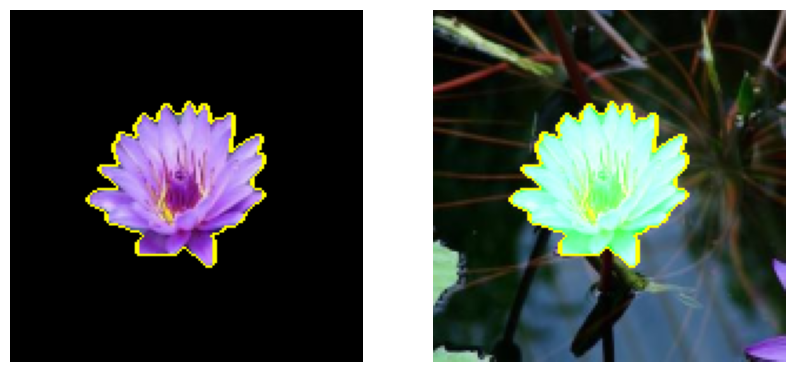

In [36]:
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=2, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

#plt.savefig('1.jpg')

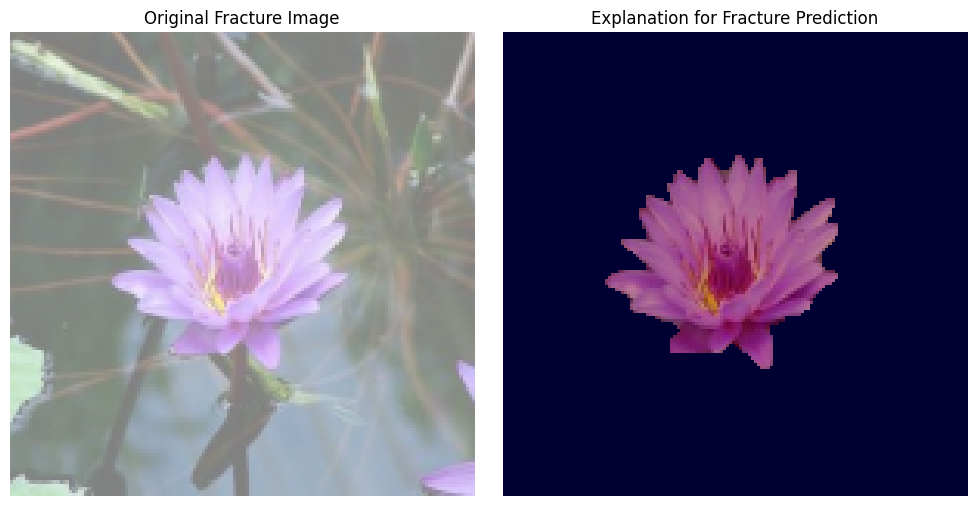

In [38]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=2, hide_rest=False)

# Display the original image and the explanation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(images[0]/ 2 + 0.5)  # Rescale image values to [0, 1]
plt.title('Original Fracture Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(temp_1)
plt.imshow(mask_1, cmap='jet', alpha=0.4)
plt.title(f'Explanation for Fracture Prediction')
plt.axis('off')


plt.tight_layout()
plt.show()

#plt.savefig('1.jpg')